<a href="https://colab.research.google.com/github/MISJasonChuang/EDD_ELM/blob/main/synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# hide code cell output
from google.colab import drive
drive.mount('/content/drive')

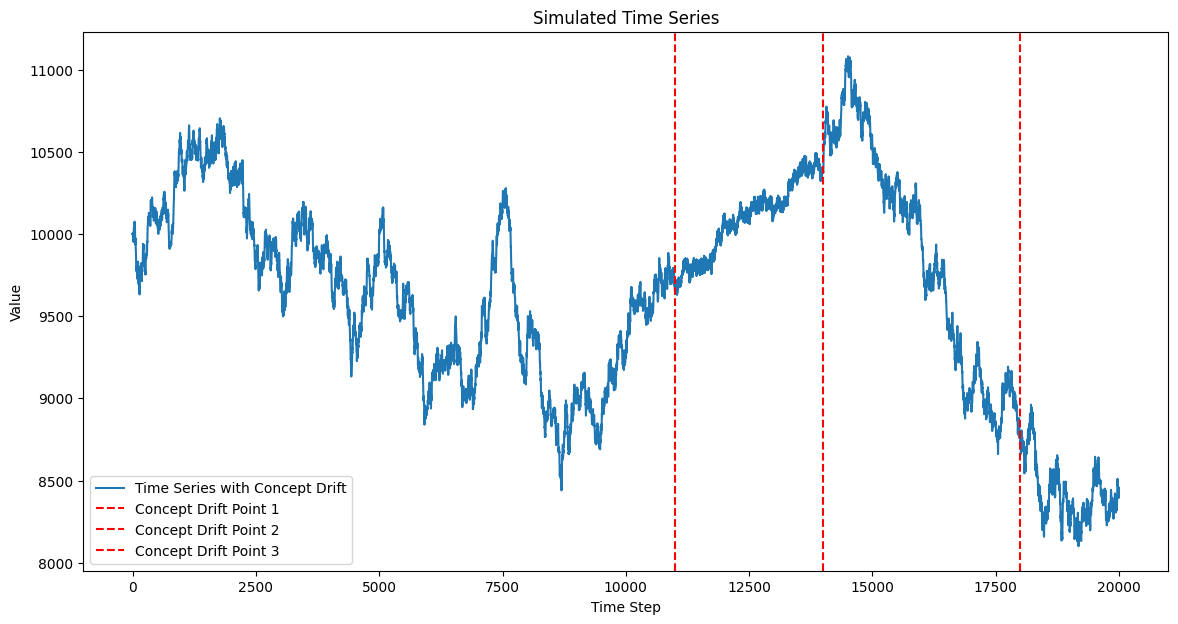

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pytz
from datetime import datetime

# Total number of instances
n_instances = 20000

drift_point_1 = 11000
drift_point_2 = 14000
drift_point_3 = 18000
# Initialize the time series array with small random numbers for the first 7 instances
time_series = np.random.normal(10000, 0, 4)

def model_1(x, w):
    return 1.5 * x[-1] - 0.4 * x[-2] - 0.3 * x[-3] + 0.2 * x[-4] + w

def model_2(x, w):
    return -0.1 * x[-1] + 1.2 * x[-2] + 0.4 * x[-3] - 0.5 * x[-4] + w

def model_3(x, w):
    return (0.9 * x[-1] + 0.8 * x[-2] - 0.6 * x[-3] + 0.2 * x[-4] -
            0.5 * x[-5] - 0.2 * x[-6] + 0.4 * x[-7] + w)

# Generate the time series with concept drift
for t in range(4, n_instances):
    wt = np.random.normal(0, 10)  # Random noise term
    # drift point
    if t < drift_point_1:
        xt = model_1(time_series[-4:], wt)
    elif t > drift_point_1 and drift_point_2 > t:
        xt = model_2(time_series[-4:], wt)
    elif t > drift_point_2 and drift_point_3 > t:
        xt = model_1(time_series[-4:], wt)
    else:
        xt = model_3(time_series[-7:], wt)
    time_series = np.append(time_series, xt)

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Time Series with Concept Drift')
plt.title('Simulated Time Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.axvline(x=drift_point_1, color='r', linestyle='--', label='Concept Drift Point 1')
plt.axvline(x=drift_point_2, color='r', linestyle='--', label='Concept Drift Point 2')
plt.axvline(x=drift_point_3, color='r', linestyle='--', label='Concept Drift Point 3')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from datetime import date


date_list = pd.date_range(end = date.today(), periods = n_instances).to_pydatetime().tolist()
volume = np.random.randint(low=10000, high=100000, size=n_instances)
lst = date_list
lst2 = time_series
lst3 = volume
lst4 = time_series
lst5 = time_series
lst6 = time_series

delta = 10

df = pd.DataFrame(list(zip(lst, lst2, lst3, lst4, lst5, lst6)),
               columns =['Date','Close/Last','Volume','Open','High','Low'])
df['High'] = df['High'] + delta
df['Low'] = df['Low'] - delta
df['Close/Last'] = df.apply(lambda row: row['Open'] + np.random.randint(low=-delta, high=delta, size=1)[0], axis=1)
today = datetime.now(pytz.timezone('Asia/Taipei')).strftime('%Y-%m-%d-%H')
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/fake-{n_instances}-{today}.csv', index=False)
df.head(10)

In [ ]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Create a date range
dates = pd.date_range(start="2020-01-01", periods=4000, freq='B')  # B for business day frequency

# Initialize the DataFrame
df = pd.DataFrame(index=dates, columns=['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'])
df['Date'] = dates

# Constants for baseline prices and volume
baseline_open = 100
baseline_high = 105
baseline_low = 95
baseline_close = 100
baseline_volume = 100000

# Simulate the stock prices with seasonality and concept drift
for i in range(len(df)):
    if i < 2400:  # Concept A
        seasonal_effect = 10 * np.sin(2 * np.pi * i / 365)  # Annual seasonality
    elif i < 3000:  # Concept B
        seasonal_effect = 15 * np.sin(2 * np.pi * i / 183)  # Biannual seasonality
    elif i < 3600:  # Concept C
        seasonal_effect = 20 * np.sin(2 * np.pi * i / 90)   # Quarterly seasonality
    else:  # Concept A again
        seasonal_effect = 10 * np.sin(2 * np.pi * i / 365)  # Annual seasonality

    # Set the prices with some random noise
    open_price = baseline_open + seasonal_effect + np.random.normal(0, 2)
    high_price = open_price + np.random.normal(1, 2)
    low_price = open_price - np.random.normal(1, 2)
    close_price = open_price + np.random.normal(0, 2)

    # Fill the DataFrame
    df.loc[df.index[i], 'Open'] = open_price
    df.loc[df.index[i], 'High'] = high_price
    df.loc[df.index[i], 'Low'] = low_price
    df.loc[df.index[i], 'Close/Last'] = close_price
    df.loc[df.index[i], 'Volume'] = baseline_volume + int(np.random.normal(0, 10000))

df.head()


In [ ]:
# @title Closing Price Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
_ = plt.title('Closing Price Over Time')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Total number of instances
n_instances = 4000

# Drift points
drift_point_1 = 1200
drift_point_2 = 2400
drift_point_3 = 3600

# Initialize the time series array
time_series = np.zeros(n_instances)
time_series[0] = 500  # Starting stock price

# Noise level
noise_level = 1
num = np.random.randint(0, 1000000)
print("random number ",num)
np.random.seed(num)
# Generate the time series with concept drift
for t in range(1, n_instances):
    noise = np.random.normal(0, noise_level)
    if t == drift_point_1 or t == drift_point_2 or t == drift_point_3:
        drift = np.random.normal(50, 5, 1)
        if t == drift_point_2:
            noise_level /= 1.5
            time_series[t] = time_series[t - 1] - drift[0] + noise
        else:
            noise_level *= 1.5
            time_series[t] = time_series[t - 1] + drift[0] + noise
    else:
        time_series[t] = time_series[t - 1] + noise
print(time_series)
# Plotting the simulated time series
plt.figure(figsize=(14, 7))
plt.plot(time_series, label='Simulated Stock Price')
plt.axvline(x=drift_point_1, color='r', linestyle='--', label='Drift Point 1')
plt.axvline(x=drift_point_2, color='g', linestyle='--', label='Drift Point 2')
plt.axvline(x=drift_point_3, color='b', linestyle='--', label='Drift Point 3')
plt.title('Simulated Time Series resembling Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from datetime import date


date_list = pd.date_range(end = date.today(), periods = n_instances).to_pydatetime().tolist()
volume = np.random.randint(low=10000, high=20000, size=n_instances)
lst = date_list
lst2 = time_series
lst3 = volume
lst4 = time_series
lst5 = time_series
lst6 = time_series

delta = 10

df = pd.DataFrame(list(zip(lst, lst2, lst3, lst4, lst5, lst6)),
               columns =['Date','Close/Last','Volume','Open','High','Low'])
df['High'] = df['High'] + delta
df['Low'] = df['Low'] - delta
df['Close/Last'] = df.apply(lambda row: row['Open'] + np.random.randint(low=-delta, high=delta, size=1)[0], axis=1)
df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/fake-{n_instances}-{today}.csv', index=False)
today = datetime.now(pytz.timezone('Asia/Taipei')).strftime('%Y-%m-%d-%H')
print(f"fake-{n_instances}-{today}.csv")
df.head(10)